## Import necessary libraries
We'll use pandas for data handling and matplotlib for visualization.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Define folder path and Zenodo records of interest
Set the path to the folder containing CSV files and specify the records for which we want to track downloads.

In [2]:
folder_path = '../download_statistics/'
records_of_interest = [
    'https://zenodo.org/records/13861026',
    'https://zenodo.org/records/15735577',
    'https://zenodo.org/records/15796252'
]

## Aggregate data from CSV files
Iterate through all CSV files, filter the data for records of interest, and combine them into a single DataFrame.

In [3]:
data = []
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        date_str = file.split('.')[0]
        df = pd.read_csv(os.path.join(folder_path, file))
        filtered = df[df['url'].isin(records_of_interest)]
        filtered['date'] = pd.to_datetime(date_str, format='%Y%m%d')
        data.append(filtered)

aggregated_data = pd.concat(data)
aggregated_data = aggregated_data.groupby(['date', 'url']).sum().reset_index()

/tmp/ipykernel_2254/1721532712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['date'] = pd.to_datetime(date_str, format='%Y%m%d')
/tmp/ipykernel_2254/1721532712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['date'] = pd.to_datetime(date_str, format='%Y%m%d')
/tmp/ipykernel_2254/1721532712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

## Save aggregated data to a CSV file
Store the aggregated data to a file for further use.

In [4]:
aggregated_data.to_csv('../docs/statistics/aggregated_downloads_over_time.csv', index=False)

## Plot downloads over time
Create a line plot showing the downloads over time for each record.

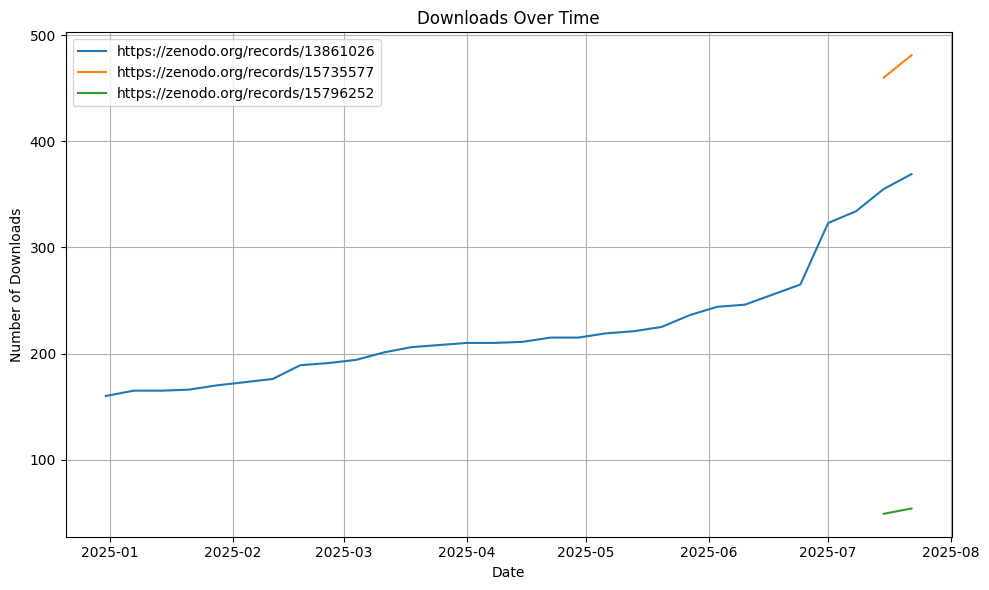

In [5]:
plt.figure(figsize=(10, 6))
for record in records_of_interest:
    record_data = aggregated_data[aggregated_data['url'] == record]
    plt.plot(record_data['date'], record_data['downloads'], label=record)

plt.xlabel('Date')
plt.ylabel('Number of Downloads')
plt.title('Downloads Over Time')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('../docs/statistics/downloads_over_time.png')
plt.show()